In [1]:
import pandas as pd
import numpy as np
import easygui
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.optimize
import kin

import trmc

mpl.rc('font',**{'size' : 16})

defaultpath = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel'

# Fitting of cavity data

In [35]:
def calc_K(f0,w,R0, printparams = False):    
    Q = f0/w
    t_rc = Q/(np.pi*f0)

    cav_w = 22.86e-3 #km(?)
    cav_h = 10.16e-3 #km
    cav_l = 76e-3 #mm  just came up with this number

    beta = cav_w/cav_h
    eps_r = 1 #dielectric
    eps_0 = 8.85e-12
    
    K = ( 2*Q*( 1 + (1/np.sqrt(R0)) ) )/(np.pi*f0*eps_r*eps_0*cav_l*beta)
    if(printparams):
#         print('eps: ', "{:.2E}".format(eps))
#         print('beta: ', "{:.2E}".format(beta))
#         print('cav_l: ', "{:.2E}".format(cav_l))
        print('f0: ', "{:.2E}".format(f0))
        print('w: ', "{:.2E}".format(w))
        print('R0: ', "{:.2E}".format(R0))
        print('Checks:')
        print('Q: ', "{:.2E}".format(Q))
        print('t_rc: ', "{:.2E}".format(t_rc))
        print('Output: ')
        print('K: ', "{:.2E}".format(K))
    return K

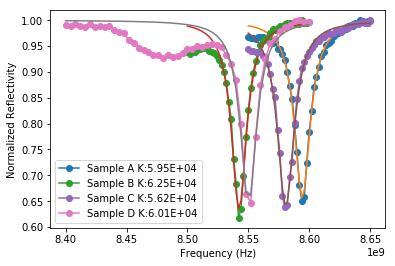

In [36]:
fp_sw_A = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Sweep_exp.csv'
fp_sw_B = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Sweep_exp.csv'
fp_sw_C = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Sweep_exp_fix.csv'
fp_sw_D = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Sweep_exp.csv'

fps = {'Sample A': fp_sw_A,'Sample B': fp_sw_B,'Sample C': fp_sw_C,'Sample D': fp_sw_D }

swps = []
for samp in fps:
    swps.append(pd.read_csv(fps[samp], index_col = 0)['Experimental R'])

swps = dict(zip(fps.keys(),swps))

swps


K = {}
for sample in swps:
    sweep = swps[sample]
#     print(sweep.index)
    xdata = sweep.index.values
    ydata = sweep.values
    

    p0 =[8.6e9,1e7,.5]
    popt,popc = scipy.optimize.curve_fit(trmc.lor,xdata,ydata, p0 )
    fit_func = trmc.lor(xdata,*popt)

    K[sample] = calc_K(f0 = popt[0], w = popt[1], R0 = popt[2], printparams = False)
    
    plt.plot(sweep, marker = 'o', label = (sample + " K:" + str("{:0.2E}".format(K[sample]))))
    plt.plot(xdata,fit_func)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Normalized Reflectivity')
    plt.legend()
    

# Pull in and plot trmc data

In [41]:

filepaths_A = ['C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Data\\High_Power_Filter=01_Fluence=6.45E+14_data.csv','C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Data\\High_Power_Filter=02_Fluence=5.121E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Data\\High_Power_Filter=03_Fluence=4.07E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Data\\High_Power_Filter=04_Fluence=3.231E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Data\\High_Power_Filter=05_Fluence=2.567E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Data\\High_Power_Filter=06_Fluence=2.038E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Data\\High_Power_Filter=07_Fluence=1.619E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Data\\High_Power_Filter=08_Fluence=6.45E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Data\\High_Power_Filter=09_Fluence=3.231E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Data\\High_Power_Filter=10_Fluence=6.45E+12_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Data\\High_Power_Filter=11_Fluence=6.45E+11_data.csv']
filepaths_B = ['C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=01_Fluence=4.573E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=02_Fluence=3.631E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=03_Fluence=2.886E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=04_Fluence=2.291E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=05_Fluence=1.82E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=06_Fluence=1.445E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=07_Fluence=1.148E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=08_Fluence=4.573E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=09_Fluence=2.291E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=10_Fluence=4.573E+12_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=11_Fluence=4.573E+11_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=12_Fluence=4.573E+10_data.csv']

filepaths_C = ['C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Data\\High_Power_Filter=01_Fluence=4.212E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Data\\High_Power_Filter=02_Fluence=3.344E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Data\\High_Power_Filter=03_Fluence=2.658E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Data\\High_Power_Filter=04_Fluence=2.11E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Data\\High_Power_Filter=05_Fluence=1.676E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Data\\High_Power_Filter=06_Fluence=1.331E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Data\\High_Power_Filter=07_Fluence=1.057E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Data\\High_Power_Filter=08_Fluence=4.212E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Data\\High_Power_Filter=09_Fluence=2.11E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Data\\High_Power_Filter=10_Fluence=4.212E+12_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Data\\High_Power_Filter=11_Fluence=4.212E+11_data.csv']
#filepaths_D = easygui.fileopenbox(default=defaultpath,multiple=True)
filepaths_D = ['C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Data\\High_Power_Filter=01_Fluence=6.74E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Data\\High_Power_Filter=02_Fluence=5.352E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Data\\High_Power_Filter=03_Fluence=4.253E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Data\\High_Power_Filter=04_Fluence=3.377E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Data\\High_Power_Filter=05_Fluence=2.683E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Data\\High_Power_Filter=06_Fluence=2.13E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Data\\High_Power_Filter=07_Fluence=1.692E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Data\\High_Power_Filter=08_Fluence=6.74E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Data\\High_Power_Filter=09_Fluence=3.377E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Data\\High_Power_Filter=10_Fluence=6.74E+12_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Data\\High_Power_Filter=11_Fluence=6.74E+11_data.csv']

fps = {'Sample A':filepaths_A,'Sample B': filepaths_B,'Sample C': filepaths_C,'Sample D': filepaths_D }

In [54]:
dfs_V = {}
dfs_cond = {}

for samp in fps:
    dfs_V[samp], back_V = trmc.load(fps[samp], offsettime = 50e-9, sub_lowpow = True)
    back_V = -0.01135
    print('Back V of ', samp, ": " ,back_V)
    dfs_cond[samp] = trmc.convert_V2cond(dfs_V[samp],back_V,K[samp])

Back V of  Sample A :  -0.01135
Back V of  Sample B :  -0.01135
Back V of  Sample C :  -0.01135
Back V of  Sample D :  -0.01135


In [55]:
def offsettime(df):
#     df_offset = pd.DataFrame(columns = df.columns)
    timemax = df[df.columns[0]].idxmax()
    time = df.index
    time1 = timemax-50e-9
    time2 = timemax+500e-9

    idx1 = time.get_loc(time1, method = 'nearest')
    idx2 = time.get_loc(time2, method = 'nearest')

    df_cut = df.iloc[idx1:idx2]
    df_cut = df_cut.set_index(time[idx1:idx2] - timemax)
    return df_cut


for samp in dfs_V:
    dfs_V[samp] = offsettime(dfs_V[samp])
    dfs_cond[samp] = offsettime(dfs_cond[samp])

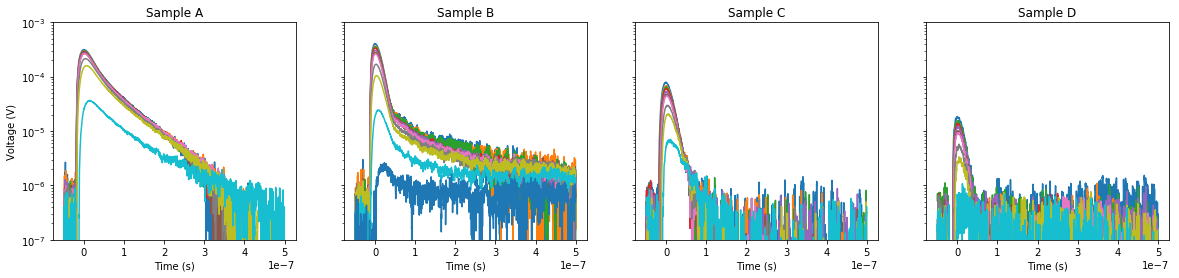

In [56]:
fig, axes = plt.subplots(1,4, sharey = True, figsize = (20,4))

for i, sample in enumerate(dfs_V):
    axes[i].plot(dfs_V[sample])
    axes[i].set_title(sample)

axes[0].set_yscale('log')
axes[0].set_ylim(1e-7,1e-3)
axes[0].set_ylabel('Voltage (V)')

for ax in axes:
    ax.set_xlabel('Time (s)')
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

645000000000000.0
457300000000000.0
421200000000000.0
674000000000000.0


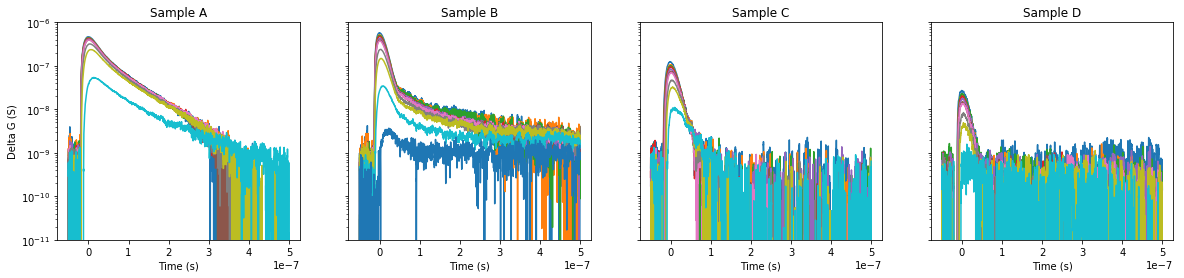

In [57]:
fig, axes = plt.subplots(1,4, sharey = True, figsize = (20,4))

for i, sample in enumerate(dfs_cond):
    print(dfs_cond[sample].iloc[-1].index.max())
    axes[i].plot(dfs_cond[sample])
    axes[i].set_title(sample)

axes[0].set_yscale('log')
axes[0].set_ylim(1e-11,1e-6)
axes[0].set_ylabel('Delta G (S)')


for ax in axes:
    ax.set_xlabel('Time (s)')
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Pull in and plot transmission data

In [58]:
# filepath = easygui.fileopenbox(default=defaultpath)
fp_quartz = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\20181025\\Quartz_4mm_newbaseline.txt'
quartz = pd.read_csv(fp_quartz, skiprows = 2,index_col = 0, squeeze=True)/100

# fp_data = easygui.fileopenbox(default=defaultpath)
fp_T_A = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\20181025\\SampleA_remres.txt'
fp_T_B = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\20181025\\SampleB_remres.txt'
fp_T_C = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\20181025\\SampleC_remres.txt'
fp_T_D = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\20181025\\SampleD_remres.txt'

fps = {'Sample A': fp_T_A,'Sample B': fp_T_B,'Sample C': fp_T_C,'Sample D': fp_T_D }

T = pd.DataFrame(columns = fps.keys())
for samp in fps:
    T[samp] = pd.read_csv(fps[samp], skiprows = 2,index_col = 0,squeeze = True)/100
    
    

#Correct for quartz
T_corr = T.copy()
for samp in T_corr:
    T_corr[samp] = T[samp]/quartz
    
#normalize to maximum value    
T_norm = T_corr.copy()
for samp in T_norm:
    T_norm[samp] = T_corr[samp]/T_norm[samp].max()
    
#Absorbance
A = T_corr.copy()
for samp in T_corr:
    A[samp] = 1-T_corr[samp]
    
#subtraced absorbance
A_sub = A.copy()
for samp in A:
    A_sub[samp] = A[samp]-(A[samp].max()-1)

Transmittance  Sample A :  0.0011553442925991944
Transmittance  Sample B :  0.12155322286041241
Transmittance  Sample C :  0.0014414295460047093
Transmittance  Sample D :  0.011454413415197727


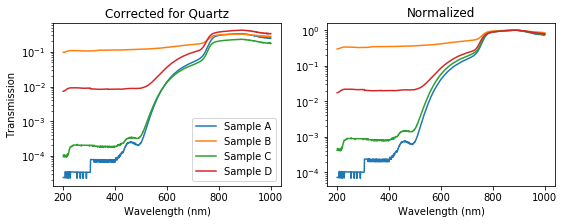

In [59]:
fig, axes = plt.subplots(1,2, figsize = (9,3))

for samp in T.columns:
#     axes[0].plot(T[samp], label = samp)
    axes[0].plot(T_corr[samp], label = samp)
    axes[1].plot(T_norm[samp], label = samp)
    print("Transmittance ", samp, ': ', str(T_corr[samp][532.0]))

# axes[0].plot(quartz, label = 'Quartz')
# axes[0].set_title('Raw Data')
axes[0].set_title('Corrected for Quartz')
axes[1].set_title('Normalized')

axes[0].set_ylabel('Transmission')
axes[0].legend()

for ax in axes:
    ax.set_xlabel('Wavelength (nm)')
    ax.set_yscale('log')

Absorbance  Sample A :  0.9988446557074008
Absorbance  Sample B :  0.8784467771395876
Absorbance  Sample C :  0.9985585704539953
Absorbance  Sample D :  0.9885455865848023


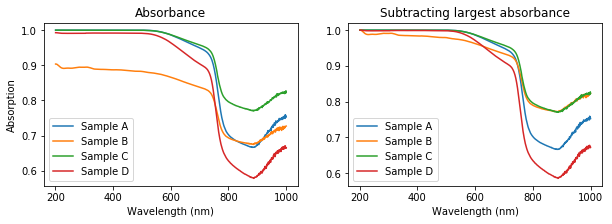

In [60]:
fig, axes = plt.subplots(1,2, figsize = (10,3))

for samp in T.columns:
    axes[0].plot(A[samp], label = samp)
    axes[1].plot(A_sub[samp], label = samp)
    print("Absorbance ", samp, ': ', str(A[samp][532.0]))

# axes[0].plot(quartz, label = 'Quartz')
axes[0].set_title('Absorbance')
axes[1].set_title('Subtracting largest absorbance')
# axes[2].set_title('Corrected and Normalized to max')
    
axes[0].set_ylabel('Absorption')
for ax in axes:
    ax.set_xlabel('Wavelength (nm)')
    ax.legend()
#     ax.set_yscale('log')

# calculate figure of merit

In [61]:
params = {
    'beta' : 2.25,
    'FA' : 0.9988446557074008,
}

cav_A = 22.86*10.16 ##mm^2


masking = {'Sample A': 50/cav_A,'Sample B': 89/cav_A,'Sample C': 70/cav_A,'Sample D': 35/cav_A}

In [62]:
masking

{'Sample A': 0.21527820833419445,
 'Sample B': 0.38319521083486613,
 'Sample C': 0.3013894916678722,
 'Sample D': 0.1506947458339361}

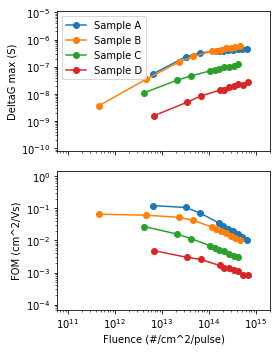

In [63]:
fig, axes = plt.subplots(2,1, sharex = True, figsize = (4,5))

for i,sample in enumerate(dfs_cond):
    df = dfs_cond[sample]
    params['M'] = masking[sample]
    maxG, fom = trmc.maxG_and_fom(df,params)
    axes[0].plot(maxG,marker = 'o', label = sample)
    axes[0].set_ylabel('DeltaG max (S)')
    axes[1].plot(fom,marker = 'o', label = sample)
    axes[1].set_ylabel('FOM (cm^2/Vs)')
    axes[1].set_xlabel('Fluence (#/cm^2/pulse)')
    axes[1].set_xlim(6e10,2e15)
    
axes[0].legend()

for ax in axes:
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.margins(0.5)
    
    
fig.tight_layout()


# kinetic modeling

In [15]:
params = {
    'FWHM':5e-9, #ns
    't0': 0e-9,
    'FA': 0.9,
    'd':1e-5 #cm-2
}

dt = 1e-9
t = np.arange(0e-9,800e-9,dt)

# k1 = 1.5e7
# k2 = 6e-11 
# k3 = 1.6e-28

ks = {
    'Sample A': {'k1': 1.2e7, 'k2':6e-13, 'k3': 0 },
    'Sample B': {'k1': 1.2e7, 'k2':6e-12, 'k3': 0 },
    'Sample C': {'k1': 1.5e7, 'k2':6e-13, 'k3': 0 },
    'Sample D': {'k1': 1.5e7, 'k2':6e-13, 'k3': 0 }
}

# k1 = 1.5e7
# k2 = 6e-13 
# k3 = 1.6e-33

n = {}
for sample in dfs_cond:
    I0 = dfs_cond[sample].columns[0]
    power, dng = kin.calc_pow(t,I0,params)
    n[sample] = kin.calc_n(dng,**ks[sample])

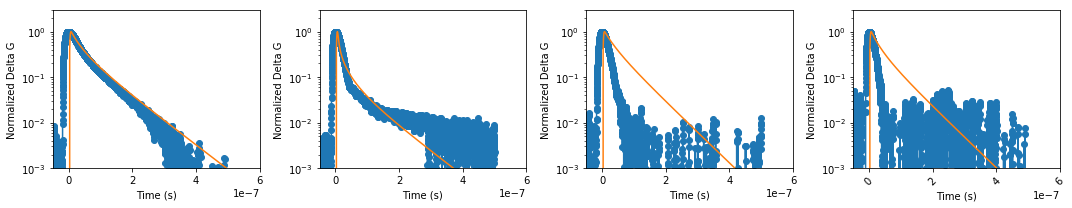

In [104]:
fig, axes = plt.subplots(1,4, figsize = (15,3))


for i, sample in enumerate(n):
    df = dfs_cond[sample]
    df = df/df.max()
    c_exp = df[df.columns[i]]
    c = n[sample]*(c_exp.max()/n[sample].max()) 

    axes[i].plot(c_exp, marker = 'o')
    axes[i].plot(c)
#     plt.yscale('log')
    # axes[i].xaxes[i]is.set_major_formatter(mpl.ticker.FormatStrFormatter('%.2f'))
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.xticks(rotation=45)
    axes[i].set_xlim(-50e-9,.6e-6)
    axes[i].set_xlabel('Time (s)')
    axes[i].set_ylabel('Normalized Delta G')
    axes[i].set_yscale('log')
    axes[i].set_ylim(1e-3,3)    
    
fig.tight_layout()

In [13]:
k1 = 1e7
k2 = 1e-10 
k3 = 1.6e-28

fluences = np.flip(fom.index,0)

n_max = np.zeros(len(fluences))
n_0max = np.zeros(len(fluences))

for i, fluence in enumerate(fluences):
    print('calculating n for fluence: ', fluence)
    power,dng = kin.calc_pow(t,fluence,params)
    n = kin.calc_n(dng,k1,k2,k3)
    #n_arr[i] = n
    n_max[i] = n.max()
    n_0max[i] = np.trapz(dng,dng.index)
    
R = pd.Series(n_max/n_0max,index = fluences)
R = R*(fom.max()/R.max())

calculating n for fluence:  645000000000.0
calculating n for fluence:  6450000000000.0
calculating n for fluence:  32310000000000.0
calculating n for fluence:  64500000000000.0
calculating n for fluence:  161900000000000.0
calculating n for fluence:  203800000000000.0
calculating n for fluence:  256700000000000.0
calculating n for fluence:  323100000000000.0
calculating n for fluence:  407000000000000.0
calculating n for fluence:  512100000000000.0
calculating n for fluence:  645000000000000.0


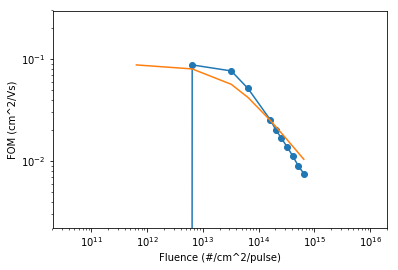

In [14]:
fig, ax = plt.subplots(1)

ax.plot(fom,marker = 'o')
ax.plot(R)
ax.set_ylabel('FOM (cm^2/Vs)')
ax.set_xlabel('Fluence (#/cm^2/pulse)')

ax.set_yscale('log')
ax.set_xscale('log')
ax.margins(0.5)